<b>Project Objective</b>

Airbnb database files contain many features from which we can learn how Airbnb is being used
around the world, giving valuable insights for business entrepreneurs and policy planners. For
my project, Amsterdam was chosen as a database file since this is my next planned travel
destination after the pandemic ends.
In this work I will use exploratory data analysis and machine learning modeling (linear regression, random forest and xgboost) for identifying factors that contribute to a listing price, and giving forcasts for new listings. Hence, the objective variable I will be using is the price per night (price).
My main goal is to find the best machine learning model which will forecasts prices, to give a new host candidate at Airbnb insights for whether his listing would have the potential to become a profitable one.

<b>Data Description</b>

Lets have a look into the data variables and see which are the valuable for us:

<b>reviews per month</b> - continues value, since it takes into account also the amount of years this listing appears. 
<b>id</b> - descrete id value of property, tells us nothing about popularity. Will be dropped. 
<b>name</b> - textuall property name. Unlikely to be valuable for us, will be dropped.
<b>host_id</b> - same as id. Will be dropped.
<b>host_name</b> - same as name. Though it will be interesting to correalte the hosts gender (for example) to the likelihood of booking, yet we don't have the hosts gender, so we will drop it.
<b>neighbourhood_group</b> - this is an empty column, all values marked as nulls, hence we will drop it.
<b>neighbourhood</b> - categorial. Likely to impact listings popularity.
<b>room type</b> - categorial. Can influence popularity.
<b>price</b> - continuous. This is our target variable.
<b>minimum nights</b> - descrete. We can predict that a higher value will be correlated to lower popularity, as being a limiting factor. Will keep it.
<b>number of reviews</b> - descrete. We will not use this column since we want a populatiry distribution that normalizes popularity through time, that is, if a property is listed in Airbnb since 2009, and another is listed since 2018, this variable will give us a highly biased indication for popularity.
<b>last review</b> - datetime of last review (and perhaps ordinal for the order the listings appeared in Airbnb). We will drop it.
<b>availability 365</b> - descrete number of the amount of days this property will be available in the folowing year. We will drop it as we don't care of future information.
<b>first review</b> - datetime of first ever review of that property. Perhaps there will be correlation between listing time in market and popularity.
<b>accomodates</b> - descrete indiacator for the maximum number of guests a property can host, a variable that can be correalted to popularity.
<b>bedrooms</b> - same as accomodates.
<b>review score value</b> - ordinaly variable with values between 2 and 10. Likely to impact popularity.
<b>amenities</b> - categorial. Lists different items and features available in a listing. We will use it in feature engineering.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import scipy
# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import datetime
from datetime import date

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r"/Users/dannystatland/Drive/MBA/data_science/Final_Project/listings_amsterdam.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,first_review,accommodates,review_scores_value,bedrooms,amenities
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,Private room,59,3,278,14/02/2020,1.95,123,30/03/2009,2,10.0,1.0,"Lock on bedroom door, Carbon monoxide alarm, S..."
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,Private room,236,1,339,09/04/2020,2.58,3,02/03/2010,2,9.0,1.0,"Wifi, Hot water, Hangers, Host greets you, Lon..."
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,Entire home/apt,125,14,5,09/02/2020,0.14,33,21/01/2018,3,10.0,1.0,"Microwave, Refrigerator, Dishes and silverware..."
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,Private room,135,2,219,25/07/2020,2.01,219,09/01/2012,2,10.0,1.0,"Carbon monoxide alarm, Private living room, Re..."
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,Private room,75,2,336,20/09/2020,2.68,346,22/08/2010,2,10.0,1.0,"Wifi, Hot water, Private entrance, Hangers, Ho..."


Lets list all the features in the dataset:

In [3]:
df.reviews_per_month.std()

1.1590438637492497

In [4]:
df.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'first_review', 'accommodates',
       'review_scores_value', 'bedrooms', 'amenities'], dtype=object)

Now, as explained in the data description section, lets drop all the features that cannot assist our objective:

In [5]:
df.drop(["name","id","host_id","host_name","neighbourhood_group","last_review"], axis=1, inplace=True)
df.head(2)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,first_review,accommodates,review_scores_value,bedrooms,amenities
0,Oostelijk Havengebied - Indische Buurt,Private room,59,3,278,1.95,123,30/03/2009,2,10.0,1.0,"Lock on bedroom door, Carbon monoxide alarm, S..."
1,Centrum-Oost,Private room,236,1,339,2.58,3,02/03/2010,2,9.0,1.0,"Wifi, Hot water, Hangers, Host greets you, Lon..."


In [6]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,accommodates,review_scores_value,bedrooms
count,18522.000000,18522.000000,18522.000000,16147.000000,18522.000000,18522.000000,15886.000000,17508.000000
mean,153.998218,3.597074,24.411133,0.637445,56.578501,2.840514,9.202883,1.534384
std,149.124299,14.194230,54.648059,1.159044,111.719419,1.285011,0.826273,0.951389
min,0.000000,1.000000,0.000000,0.010000,0.000000,0.000000,2.000000,1.000000
25%,94.000000,2.000000,2.000000,0.130000,0.000000,2.000000,9.000000,1.000000
50%,128.000000,2.000000,8.000000,0.300000,0.000000,2.000000,9.000000,1.000000
75%,180.000000,3.000000,22.000000,0.620000,45.000000,4.000000,10.000000,2.000000
max,8000.000000,1001.000000,858.000000,39.310000,365.000000,16.000000,10.000000,50.000000


We can see that there are max of 18,522 entries (listed properties) in the data columns. Prices range from min 0 usd to max 8000 usd per night for property, with a mean of 153 usd per night. Std is 149, therfore the most of properties are priced in range 5 to 303 usd per night. The median is 128 usd per night, meaning half of listings are priced below 128 usd per night. 

Another interesting value that caught my attention was the max value of the minimum nights feature. Intuitively, we can assume that properties with a high value of minimum nights are aimed for subleting. 

<b>Dealing with missing values</b> 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522 entries, 0 to 18521
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood        18522 non-null  object 
 1   room_type            18522 non-null  object 
 2   price                18522 non-null  int64  
 3   minimum_nights       18522 non-null  int64  
 4   number_of_reviews    18522 non-null  int64  
 5   reviews_per_month    16147 non-null  float64
 6   availability_365     18522 non-null  int64  
 7   first_review         16147 non-null  object 
 8   accommodates         18522 non-null  int64  
 9   review_scores_value  15886 non-null  float64
 10  bedrooms             17508 non-null  float64
 11  amenities            18470 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 1.7+ MB


As we can see, after dropping some columns we have left with 14. Each column has range index of 18522 entries (number of rows). We will convert first_review from object to datetime data type, to be able to use it later:

In [8]:
df["first_review"] = pd.to_datetime(df["first_review"])

We can also see that all columns with less than 18522 entries have missing (null) values. Lets present them in a clearer way.

In [9]:
df.isnull().any()

neighbourhood          False
room_type              False
price                  False
minimum_nights         False
number_of_reviews      False
reviews_per_month       True
availability_365       False
first_review            True
accommodates           False
review_scores_value     True
bedrooms                True
amenities               True
dtype: bool

"reviews_per_month", "first_review", "bedrooms", "amenities" and "review_scores_value" contain missing values. 

"reviews_per_month" is our objective variable, reflecting our outcome (popularity). Hence properties with a missing value for this variable should be dropped, otherwise we will get some biased results.

"first_review" was changed to a datetime type variable, and is indicating the experience level of the property, thus can be correlated to popularity. We should fill missing values with the mean date.

"bedrooms" and "review_scores_value" hold numerical values, so we can replace missing values with the mean in each.

"amenities" holds categorical values which we will later want to use, and there are not so many missing values, so we will simply fill them with the string "empty". 

We will create another column to indicate artificial values (mean placed values).
For "bedroom" variable we can be even more accurate, and instead just replacing empty values with the mean, we can first group by "accomodates" which has no empty values and describes the number of guests possible in that property (hence will be probably correlated to the number of bedrooms), and then choose the mean of the bedrooms for the value of "accomodates".

In [10]:
df.dropna(subset=["reviews_per_month"], inplace=True)
df.isnull().any()

neighbourhood          False
room_type              False
price                  False
minimum_nights         False
number_of_reviews      False
reviews_per_month      False
availability_365       False
first_review           False
accommodates           False
review_scores_value     True
bedrooms                True
amenities               True
dtype: bool

We see that "first_review" also turned to false, so all empty rows for this column were also empty for the "reviews_per_month" column and were therefore dropped.

In [11]:
#replace empty values with the mean of that variable and mark as artificial
df["review_scores_value_available"] = ~df["review_scores_value"].isnull()
df["review_scores_value"] = df["review_scores_value"].fillna(df["review_scores_value"].mean())

#replace amenities ampty values with the string "empty"
df["amenities"] = df["amenities"].fillna("empty")

#get more accurate mean for missing values of "bedrooms" column by using "accomodates" column
df["accommodates_available"] = ~df["accommodates"].isnull()
df.groupby("accommodates")["bedrooms"].mean()

accommodates
1     1.031519
2     1.052453
3     1.521417
4     2.126250
5     2.915751
6     3.066176
7     3.742857
8     3.906977
9     2.500000
10    4.714286
12    4.111111
14    7.000000
16    8.130435
Name: bedrooms, dtype: float64

In [12]:
accomodates_bedrooms_dict = {1:1.03, 2:1.05, 3:1.52, 4:2.12, 5:2.91, 6:3.06, 7:3.74, 8:3.90, 9:2.50, 10:4.71, 12:4.11, 14:7.00, 16:8.13}
for key,val in accomodates_bedrooms_dict.items():
    df.loc[(df.bedrooms.isnull()) & (df.accommodates==key),"bedrooms"] = val


In [13]:
df.isna().any()

neighbourhood                    False
room_type                        False
price                            False
minimum_nights                   False
number_of_reviews                False
reviews_per_month                False
availability_365                 False
first_review                     False
accommodates                     False
review_scores_value              False
bedrooms                         False
amenities                        False
review_scores_value_available    False
accommodates_available           False
dtype: bool

We have now finished handling missing data.

<b>Exploratory Data Analysis</b>

Let's first analyze the distribution of our objective variable


<b>Density Estimation</b>

Advertised prices range from $5 to $8000.


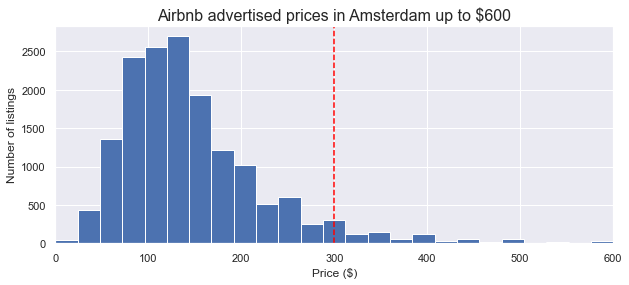

In [14]:
print(f"Advertised prices range from ${min(df.price)} to ${max(df.price)}.")
# Distribution of prices from $0 to $600
plt.figure(figsize=(10,4))
df.price.hist(bins=25, range=(0,600))
plt.margins(x=0)
plt.axvline(300, color='red', linestyle='--')
plt.title("Airbnb advertised prices in Amsterdam up to $600", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

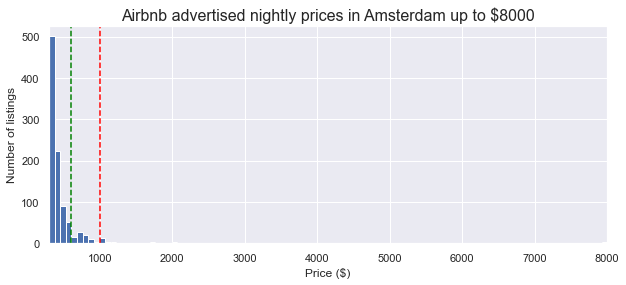

In [15]:
# Distribution of prices from $300 upwards
plt.figure(figsize=(10,4))
df.price.hist(bins=100, range=(300, max(df.price)))
plt.margins(x=0)
plt.axvline(600, color='green', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in Amsterdam up to $8000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

In [16]:
df.price.describe()

count    16147.000000
mean       152.322908
std        144.137562
min          5.000000
25%         95.000000
50%        127.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64

In [17]:
df = df[df.price < 400]

<b>Listing price by popularity</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '(0, 20]'),
  Text(1, 0, '(20, 40]'),
  Text(2, 0, '(40, 60]'),
  Text(3, 0, '(60, 80]'),
  Text(4, 0, '(80, 100]'),
  Text(5, 0, '(100, 120]'),
  Text(6, 0, '(120, 140]'),
  Text(7, 0, '(140, 160]'),
  Text(8, 0, '(160, 180]'),
  Text(9, 0, '(180, 200]'),
  Text(10, 0, '(200, 220]'),
  Text(11, 0, '(220, 240]'),
  Text(12, 0, '(240, 260]'),
  Text(13, 0, '(260, 280]')])

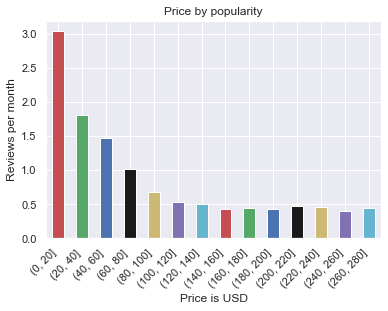

In [18]:
df['reviews_per_month'].groupby(pd.cut(df['price'], np.arange(0,300,20))).mean().plot(kind='bar', color=list('rgbkymc'))
plt.title("Price by popularity")
plt.ylabel("Reviews per month")
plt.xlabel("Price is USD")
plt.xticks(rotation=45, ha='right')


Text(0.5, 49.99999999999995, 'Price is USD')

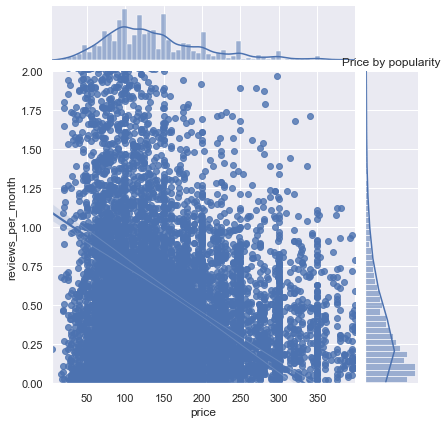

In [19]:
sns.jointplot(data=df, x="price", y="reviews_per_month", ylim=(0,2), kind='reg')
plt.title("Price by popularity")
plt.ylabel("Reviews per month")
plt.xlabel("Price is USD")

<b>Price by minimum nights</b>



In [20]:
df = df[df.minimum_nights < 18]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17')])

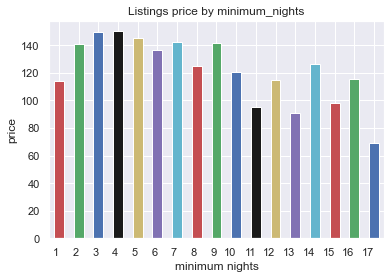

In [21]:
df['price'].groupby(df['m']).mean().plot(kind='bar',color=list('rgbkymc'))
plt.title("Listings price by minimum_nights")
plt.xlabel("minimum nights")
plt.ylabel("price")
plt.xticks(rotation=0, ha='right')

<b>Price by neighbourhood</b> 

Now lets see if a listing is likely to be more expensive if offered in specific neighbourhoods:

Text(0.5, 0, 'price')

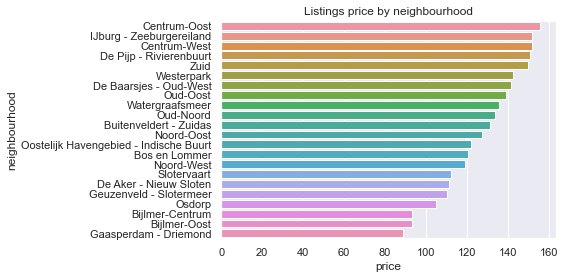

In [22]:
#Group neighbourhoods by average price value
df_new = df.groupby(["neighbourhood"], as_index=False).agg({"price":np.mean})
#Sort the subdata frame by price
df_new = df_new.sort_values(by=["price"], ascending=False)
sns.barplot(x="price", y="neighbourhood", data=df_new)
plt.title("Listings price by neighbourhood")
plt.ylabel('neighbourhood')
plt.xlabel('price')

<b>Listing price by room type</b>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Hotel room'),
  Text(2, 0, 'Private room'),
  Text(3, 0, 'Shared room')])

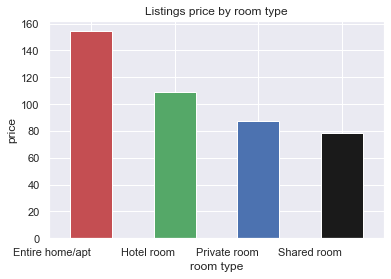

In [23]:
df['price'].groupby(df['room_type']).mean().plot(kind='bar',color=list('rgbkymc'))
plt.title("Listings price by room type")
plt.xlabel("room type")
plt.ylabel("price")
plt.xticks(rotation=0, ha='right')

Text(0.5, 1.0, 'Listings price by room type')

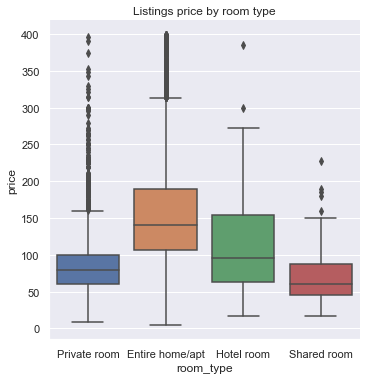

In [24]:
sns.catplot(x="room_type", y="price", kind="box", data=df)
plt.title("Listings price by room type")

<b>Price by accommodates</b>

Areas of multi-collinearity:

Bedrooms and the number of people that a property accommodates are highly correlated. The number of people accommodated has traditionally been a more high priority search parameter on Airbnb, as it is more relevant for private and shared rooms than the number of bedrooms (and is still the second highest priority parameter when searching on the site, after dates. Hence, bedrooms feature has been dropped.

Text(0.5, 0, 'accommodates')

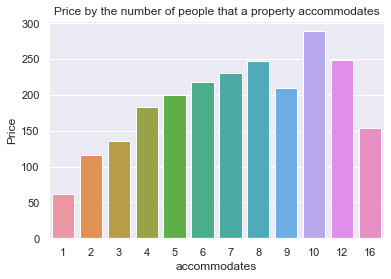

In [25]:
df_new = df.groupby(["accommodates"], as_index=False).agg({"price":np.mean})
df_new = df_new.sort_values(by=["price"], ascending=False)
sns.barplot(y="price", x="accommodates", data=df_new)
plt.title("Price by the number of people that a property accommodates")
plt.ylabel("Price")
plt.xlabel("accommodates")

<b>Price by number of reviews</b>

<Figure size 720x288 with 0 Axes>

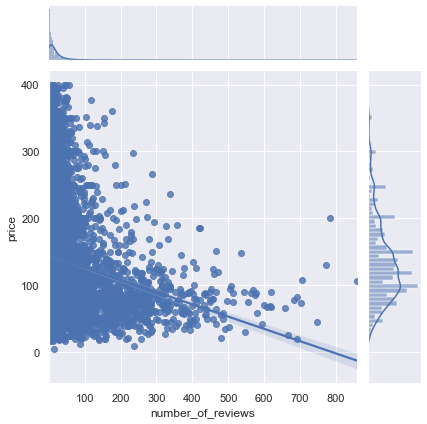

In [29]:
plt.figure(figsize=(10,4))
sns.jointplot(data=df,x='number_of_reviews', y='price',kind='reg')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '(0, 5]'),
  Text(1, 0, '(5, 10]'),
  Text(2, 0, '(10, 15]'),
  Text(3, 0, '(15, 20]'),
  Text(4, 0, '(20, 25]'),
  Text(5, 0, '(25, 30]'),
  Text(6, 0, '(30, 35]'),
  Text(7, 0, '(35, 40]'),
  Text(8, 0, '(40, 45]'),
  Text(9, 0, '(45, 50]'),
  Text(10, 0, '(50, 55]'),
  Text(11, 0, '(55, 60]'),
  Text(12, 0, '(60, 65]'),
  Text(13, 0, '(65, 70]'),
  Text(14, 0, '(70, 75]'),
  Text(15, 0, '(75, 80]'),
  Text(16, 0, '(80, 85]'),
  Text(17, 0, '(85, 90]'),
  Text(18, 0, '(90, 95]'),
  Text(19, 0, '(95, 100]'),
  Text(20, 0, '(100, 105]'),
  Text(21, 0, '(105, 110]'),
  Text(22, 0, '(110, 115]'),
  Text(23, 0, '(115, 120]'),
  Text(24, 0, '(120, 125]'),
  Text(25, 0, '(125, 130]'),
  Text(26, 0, '(130, 135]'),
  Text(27, 0, '(135, 140]'),
  Text(28, 0, '(140, 145]'),
  Text(29, 0, '(145, 150]'),


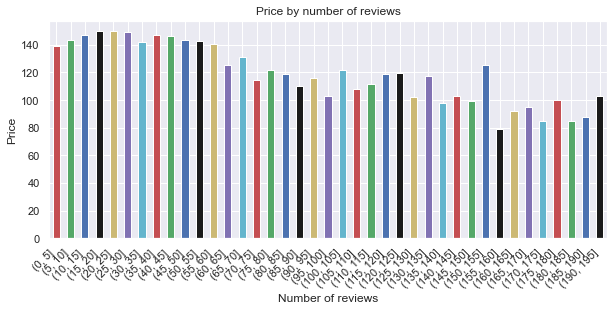

In [30]:
plt.figure(figsize=(10,4))
df['price'].groupby(pd.cut(df['number_of_reviews'], np.arange(0,200,5))).mean().plot(kind='bar', color=list('rgbkymc'))
plt.margins(x=0)
plt.title("Price by number of reviews")
plt.ylabel("Price")
plt.xlabel("Number of reviews")
plt.xticks(rotation=45, ha='right')

<b>Feature Engineering</b>

<b>New feature: price by number of amenities</b>



In [31]:
df["count_amenities"] = df["amenities"].str.count('\w+')
df["count_amenities"].head(5)

0    57
1    35
2    47
3    46
4    27
Name: count_amenities, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(0.876, 25.8]'),
  Text(1, 0, '(25.8, 50.6]'),
  Text(2, 0, '(50.6, 75.4]'),
  Text(3, 0, '(75.4, 100.2]'),
  Text(4, 0, '(100.2, 125.0]')])

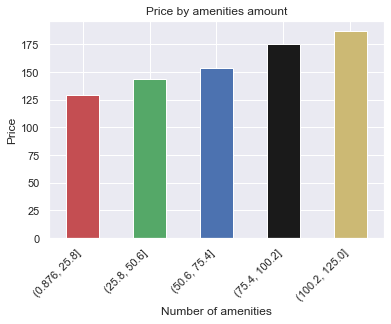

In [32]:
df['price'].groupby(pd.cut(df['count_amenities'], 5)).mean().plot(kind='bar', color=list('rgbkymc'))
plt.title("Price by amenities amount")
plt.ylabel("Price")
plt.xlabel("Number of amenities")
plt.xticks(rotation=45, ha='right')

In [33]:
df["accommodates"].corr(df["bedrooms"])

0.7143470629836196

<b>Modelling</b>

Now that the data preprocessing is over, we can start applying different Supervised Machine Learning models. We will compare three models:

1. LinearRegression from Scikit-Learn library
2.XGBoost
3. Random Forest

The evaluation metrics used will be mean squared error (for loss) and r-squared (for accuracy).


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 0 to 18506
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   neighbourhood                  15556 non-null  object        
 1   room_type                      15556 non-null  object        
 2   price                          15556 non-null  int64         
 3   minimum_nights                 15556 non-null  int64         
 4   number_of_reviews              15556 non-null  int64         
 5   reviews_per_month              15556 non-null  float64       
 6   availability_365               15556 non-null  int64         
 7   first_review                   15556 non-null  datetime64[ns]
 8   accommodates                   15556 non-null  int64         
 9   review_scores_value            15556 non-null  float64       
 10  bedrooms                       15556 non-null  float64       
 11  amenities      

In [35]:
#drop irrelevant columns
#"availability_365", "first_review", "review_scores_value"
df.drop(["amenities", "accommodates_available", "review_scores_value_available", "bedrooms"], axis=1, inplace=True)

In [36]:
#convert datetime datatype to ordinal dataype to enable sklearn modeling
df['first_review'] = df['first_review'].apply(lambda x: x.toordinal())

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 0 to 18506
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood        15556 non-null  object 
 1   room_type            15556 non-null  object 
 2   price                15556 non-null  int64  
 3   minimum_nights       15556 non-null  int64  
 4   number_of_reviews    15556 non-null  int64  
 5   reviews_per_month    15556 non-null  float64
 6   availability_365     15556 non-null  int64  
 7   first_review         15556 non-null  int64  
 8   accommodates         15556 non-null  int64  
 9   review_scores_value  15556 non-null  float64
 10  count_amenities      15556 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.9+ MB


In [38]:
df_dummies = pd.get_dummies(df)
#set this equal to a new variable since it will be a different data set
#dropping the first column just removes the redundancy of having all the columns there
df_dummies.head()


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,first_review,accommodates,review_scores_value,count_amenities,neighbourhood_Bijlmer-Centrum,...,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,59,3,278,1.95,123,733496,2,10.0,57,0,...,0,0,0,0,0,0,0,0,1,0
1,236,1,339,2.58,3,733806,2,9.0,35,0,...,0,0,0,0,0,0,0,0,1,0
2,125,14,5,0.14,33,736715,3,10.0,47,0,...,0,0,0,0,0,0,1,0,0,0
3,135,2,219,2.01,219,734747,2,10.0,46,0,...,0,0,0,0,0,0,0,0,1,0
4,75,2,336,2.68,346,734006,2,10.0,27,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
X = df_dummies.copy() 
y = X.pop('price')

#### Standardising and normalising

Other than `price`, `first_review` and `count_amenities`, the remaining numerical features are all postively or negatively skewed and could benefit from log transformation.

In [40]:
numerical_columns = ['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','first_review','accommodates','review_scores_value','count_amenities']

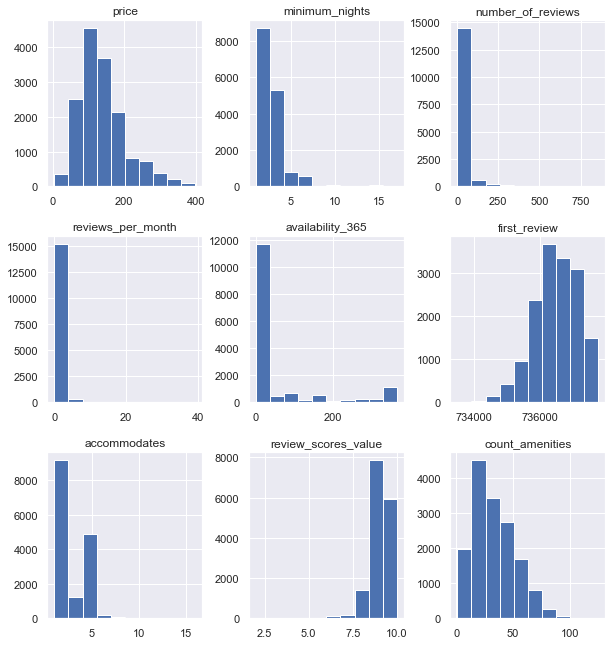

In [41]:
df_dummies[numerical_columns].hist(figsize=(10,11));

In [42]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns 
                     if i not in ['review_scores_value','price']] # Removing items not to be transformed

for col in numerical_columns:
    df_dummies[col] = df_dummies[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df_dummies[col] = np.log(df_dummies[col])

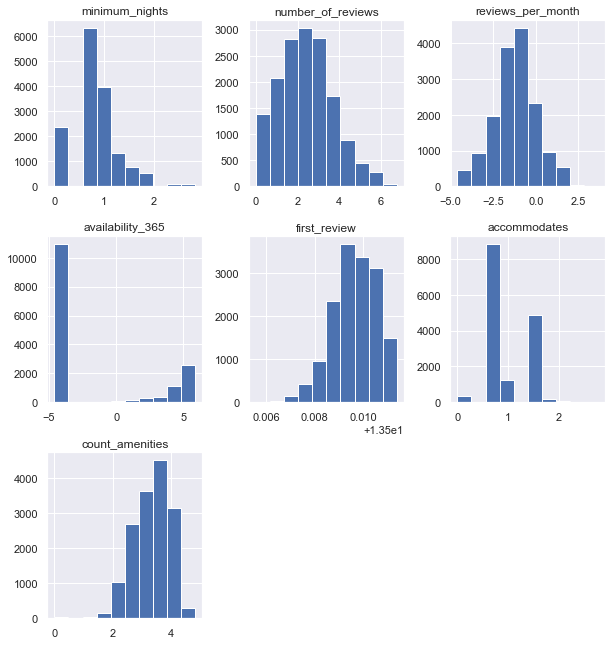

In [43]:
df_dummies[numerical_columns].hist(figsize=(10,11));

In [44]:
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [45]:
from sklearn.metrics import mean_absolute_error


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=123) 

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import math
lr_model = LinearRegression().fit(X_train, y_train)
scores = cross_val_score(lr_model, X, y, cv=5)
train_predicts = lr_model.predict(X_train)
test_predicts = lr_model.predict(X_test)
print("Training Score:", lr_model.score(X_train, y_train))
print("Test Score:", lr_model.score(X_test, y_test))
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# Check the predictions against the actual values by using the MSE and R-2 metrics:
#The RMSE measures the distance between our predicted values and actual values.
mse = round(mean_squared_error(y_train, train_predicts),4)
print(math.sqrt(mse))
print("test RMSE:", round(mean_squared_error(y_test, test_predicts),4))

Training Score: 0.40304222693059766
Test Score: 0.41087349318112165
Cross-validated training scores: [0.43168638 0.40338273 0.37208424 0.3915411  0.35765468]
Mean cross-validated training score: 0.3912698260585191
51.92164481215902
test RMSE: 2642.3786


We can compare the actual output values for `X_test` with the predicted values in a dataframe:

<ipython-input-48-743e2e0d7152>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate( s=overlay,xy=(5.5,2.5),size='x-large')


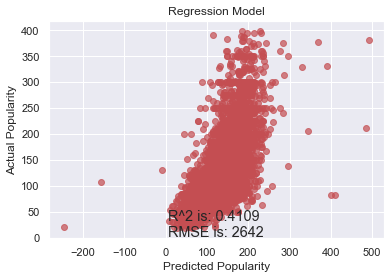

In [48]:
actual_values = y_test
plt.scatter(test_predicts, actual_values, alpha=.7,
            color='r') #alpha helps to show overlapping data
overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    (round(r2_score(y_test, test_predicts),4)),
                    (round(mean_squared_error(y_test, test_predicts))),4)
plt.annotate( s=overlay,xy=(5.5,2.5),size='x-large')
plt.xlabel('Predicted Popularity')
plt.ylabel('Actual Popularity')
plt.title('Regression Model')
plt.show()

Gradient boosted decision trees

In [49]:
import xgboost as xgb
from xgboost import plot_importance


Training r2: 0.5104
Validation r2: 0.4476

Training RMSE: 47.02190872348761
Validation RMSE: 49.774788799150116

Training MAE: 5.875159572300994
Validation MAE: 6.0255456184481755


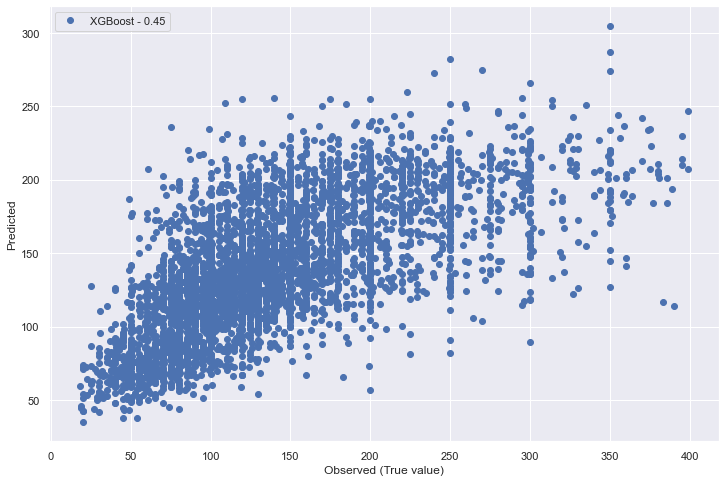

In [50]:

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1,
              max_depth = 5, alpha = 100, n_estimators = 75)
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))
print("\nTraining RMSE:", math.sqrt(round(mean_squared_error(y_train, training_preds_xgb_reg),4)))
print("Validation RMSE:", math.sqrt(round(mean_squared_error(y_test, val_preds_xgb_reg),4)))
print("\nTraining MAE:", math.sqrt(round(mean_absolute_error(y_train, training_preds_xgb_reg),4)))
print("Validation MAE:", math.sqrt(round(mean_absolute_error(y_test, val_preds_xgb_reg),4)))


fig = plt.figure(figsize=(12,8));
rf_plot = plt.plot(y_test, xgb_reg.predict(X_test), 'ob',label = 'XGBoost - {0:2.2f}'.format(xgb_reg.score(X_test,y_test)))
plt.legend(loc = 2 )
plt.xlabel('Observed (True value)'); plt.ylabel('Predicted');

<b>Feature importance</b>

Apart from its superior performance, a benefit of using ensembles of decision tree methods like gradient boosting is that they can automatically provide estimates of feature importance from a trained predictive model.

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

In [51]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(50)

,weight
accommodates,0.224435
room_type_Entire home/apt,0.203215
room_type_Private room,0.153436
neighbourhood_Centrum-West,0.031416
neighbourhood_Bos en Lommer,0.025917
neighbourhood_Zuid,0.025839
neighbourhood_Centrum-Oost,0.023564
neighbourhood_De Pijp - Rivierenbuurt,0.023310
count_amenities,0.019813
neighbourhood_Oostelijk Havengebied - Indische Buurt,0.019753


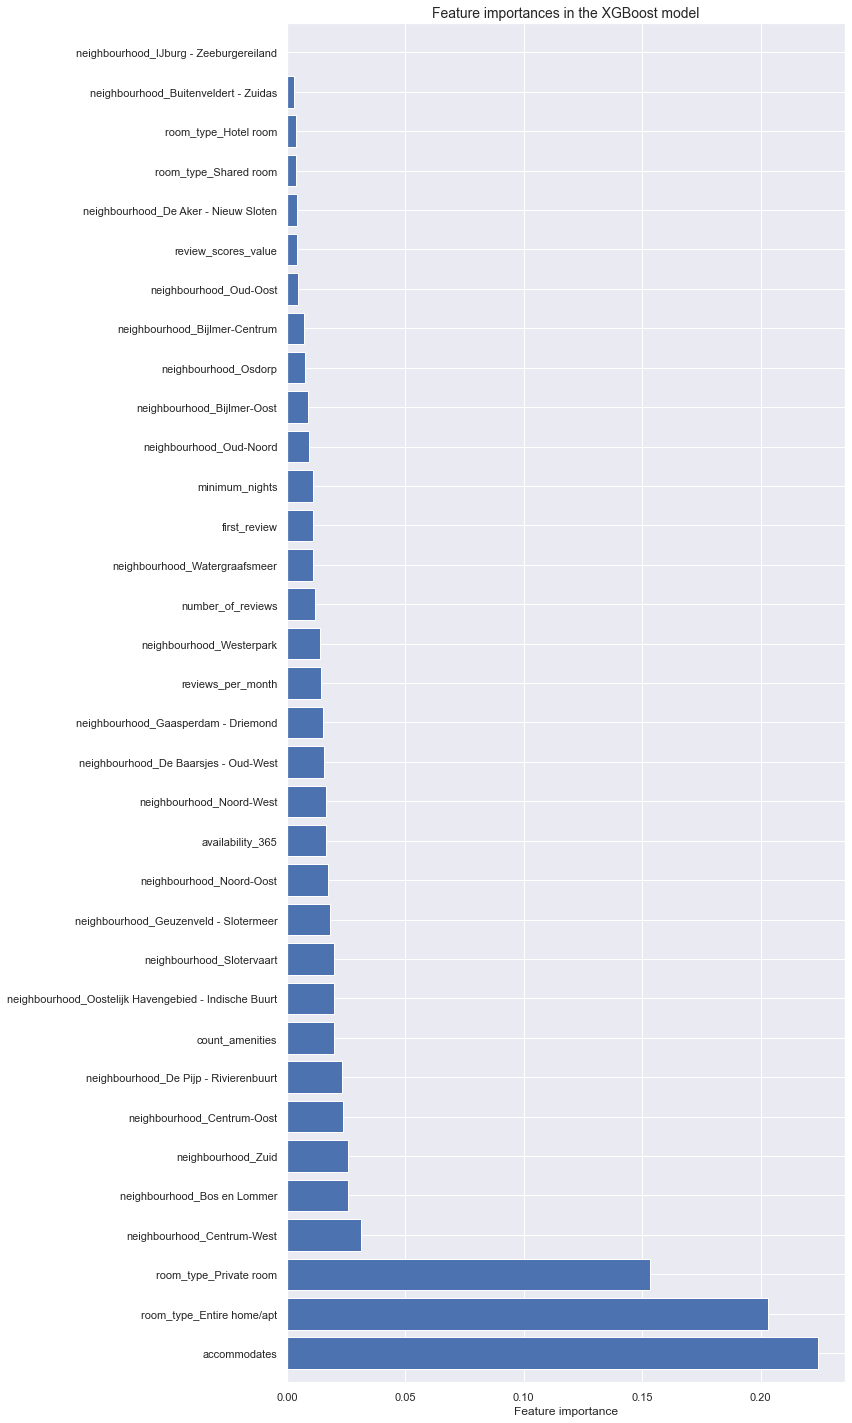

In [52]:
# Plotting feature importances
plt.figure(figsize=(10,25))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

<b>Random forest</b>

Training Score: 0.4335048283063543
Test Score: 0.38882015410369963

Training RMSE: 50.57952451338387
Validation RMSE: 52.35736146904272

Training MAE: 6.118839759300777
Validation MAE: 6.207439085484448


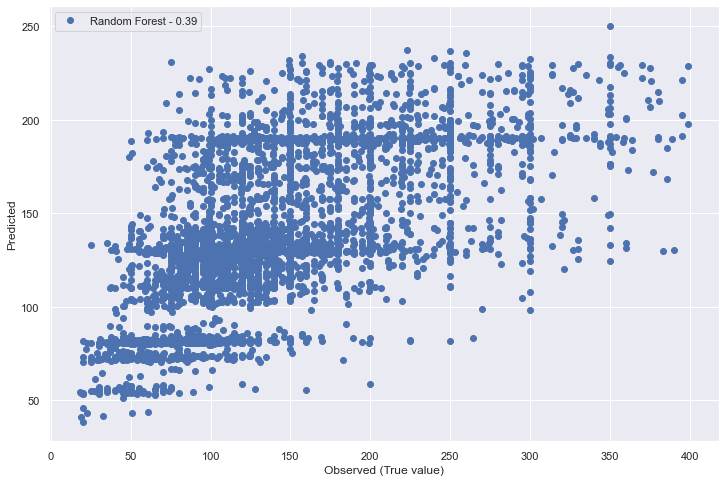

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50,n_jobs=-1, max_depth = 6)
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)
print("Training Score:", rf.score(X_train, y_train))
print("Test Score:", rf.score(X_test, y_test))
print("\nTraining RMSE:", math.sqrt(round(mean_squared_error(y_train, train_pred),4)))
print("Validation RMSE:", math.sqrt(round(mean_squared_error(y_test, test_pred),4)))
print("\nTraining MAE:", math.sqrt(round(mean_absolute_error(y_train, train_pred),4)))
print("Validation MAE:", math.sqrt(round(mean_absolute_error(y_test, test_pred),4)))
fig = plt.figure(figsize=(12,8));
rf_plot = plt.plot(y_test, rf.predict(X_test), 'ob',label = 'Random Forest - {0:2.2f}'.format(rf.score(X_test,y_test)))
plt.legend(loc = 2 )
plt.xlabel('Observed (True value)'); plt.ylabel('Predicted');

Conclusion: XGBoost is the preferred model, though it can be fine-tuned for performance improvement.